In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CO2_Emissions-master/normalized_file.csv')
df.head()

,Unnamed: 0,Year,Jet Fuel_avi_BTU,Gasoline_avi_BTU,LDV_SWB_road_BTU,LDV_LWB_road_BTU,Combination_Truck_road_BTU,Bus_Road_BTU,Passenger_Car_EFF,Passenger_Car_Age,Demand_petroleum_transportation)mil_lit,Average_MC/15000_miles(dollars),CO2_emission_million_metric_tons,CO_emission_million_shots_tons,NOx_emission_million_shots_tons,SOx_emission_million_shots_tons,Volatile_compound_million_shots_tons,overall_emission
0,0,0.000000,0.000000,0.404440,0.000000,0.478083,0.000000,0.032734,0.000000,0.5,0.000000,0.726176,0.703017,0.320520,0.729545,0.442498,0.295009,0.649714
1,1,0.047619,0.106455,1.000000,0.411229,0.000000,0.028403,0.000000,0.043931,0.5,0.063788,0.726176,0.703017,1.000000,0.989304,1.000000,1.000000,0.906227
2,2,0.142857,0.066179,0.854988,0.555588,0.096038,0.103719,0.139117,0.087862,0.5,0.285012,0.000000,0.000000,0.897027,0.962078,0.891428,1.000000,0.000000
3,3,0.238095,0.195659,1.000000,0.463469,0.192181,0.262604,0.118369,0.032948,0.5,0.315430,0.013614,0.083094,0.877346,1.000000,0.818978,1.000000,0.016970
4,4,0.333333,0.410613,0.888779,0.497766,0.385355,0.302465,0.008042,0.087862,0.5,0.360885,0.061195,0.120500,0.820983,0.928531,0.729390,0.893062,0.101837


In [ ]:
df.columns

Index(['Unnamed: 0', 'Year ', 'Jet Fuel_avi_BTU', 'Gasoline_avi_BTU',
       'LDV_SWB_road_BTU', 'LDV_LWB_road_BTU', 'Combination_Truck_road_BTU',
       'Bus_Road_BTU', 'Passenger_Car_EFF', 'Passenger_Car_Age',
       'Demand_petroleum_transportation)mil_lit',
       'Average_MC/15000_miles(dollars)', 'CO2_emission_million_metric_tons',
       'CO_emission_million_shots_tons', 'NOx_emission_million_shots_tons',
       'SOx_emission_million_shots_tons',
       'Volatile_compound_million_shots_tons', 'overall_emission'],
      dtype='object')

In [ ]:
df1=df.rename({'Year ':'year','Jet Fuel_avi_BTU':'Jet_Fuel'},axis=1)
df1

,Unnamed: 0,year,Jet_Fuel,Gasoline_avi_BTU,LDV_SWB_road_BTU,LDV_LWB_road_BTU,Combination_Truck_road_BTU,Bus_Road_BTU,Passenger_Car_EFF,Passenger_Car_Age,Demand_petroleum_transportation)mil_lit,Average_MC/15000_miles(dollars),CO2_emission_million_metric_tons,CO_emission_million_shots_tons,NOx_emission_million_shots_tons,SOx_emission_million_shots_tons,Volatile_compound_million_shots_tons,overall_emission
0,0,0.000000,0.000000,0.404440,0.000000,0.478083,0.000000,0.032734,0.000000,0.500000,0.000000,0.726176,0.703017,0.320520,0.729545,0.442498,0.295009,0.649714
1,1,0.047619,0.106455,1.000000,0.411229,0.000000,0.028403,0.000000,0.043931,0.500000,0.063788,0.726176,0.703017,1.000000,0.989304,1.000000,1.000000,0.906227
2,2,0.142857,0.066179,0.854988,0.555588,0.096038,0.103719,0.139117,0.087862,0.500000,0.285012,0.000000,0.000000,0.897027,0.962078,0.891428,1.000000,0.000000
3,3,0.238095,0.195659,1.000000,0.463469,0.192181,0.262604,0.118369,0.032948,0.500000,0.315430,0.013614,0.083094,0.877346,1.000000,0.818978,1.000000,0.016970
4,4,0.333333,0.410613,0.888779,0.497766,0.385355,0.302465,0.008042,0.087862,0.500000,0.360885,0.061195,0.120500,0.820983,0.928531,0.729390,0.893062,0.101837
5,5,0.428571,0.693087,0.633468,0.453817,0.433070,0.390053,0.044740,0.076880,0.500000,0.460239,0.288288,0.359162,0.671849,0.916106,0.721523,0.678655,0.341794
6,6,0.447619,0.578317,0.637223,0.334720,0.486200,0.417870,0.026142,0.109828,0.500000,0.437389,0.388240,0.330358,0.625378,0.897361,0.697504,0.644103,0.285928
7,7,0.466667,0.610352,0.487040,0.360217,0.541505,0.434650,0.034581,0.098845,0.500000,0.481332,0.422690,0.364787,0.584351,0.901737,0.687487,0.610852,0.317761
8,8,0.485714,0.659134,0.314331,0.396878,0.580688,0.456540,0.065188,0.120811,0.500000,0.509348,0.419600,0.384143,0.551486,0.906869,0.676917,0.588989,0.333276
9,9,0.504762,0.731951,0.306821,0.407657,0.612734,0.494661,0.095475,0.131793,0.500000,0.544657,0.436903,0.442712,0.536057,0.906544,0.662311,0.578577,0.407909


In [ ]:
df2 = df1.drop(['Unnamed: 0'],axis=1)
df2

,year,Jet_Fuel,Gasoline_avi_BTU,LDV_SWB_road_BTU,LDV_LWB_road_BTU,Combination_Truck_road_BTU,Bus_Road_BTU,Passenger_Car_EFF,Passenger_Car_Age,Demand_petroleum_transportation)mil_lit,Average_MC/15000_miles(dollars),CO2_emission_million_metric_tons,CO_emission_million_shots_tons,NOx_emission_million_shots_tons,SOx_emission_million_shots_tons,Volatile_compound_million_shots_tons,overall_emission
0,0.000000,0.000000,0.404440,0.000000,0.478083,0.000000,0.032734,0.000000,0.500000,0.000000,0.726176,0.703017,0.320520,0.729545,0.442498,0.295009,0.649714
1,0.047619,0.106455,1.000000,0.411229,0.000000,0.028403,0.000000,0.043931,0.500000,0.063788,0.726176,0.703017,1.000000,0.989304,1.000000,1.000000,0.906227
2,0.142857,0.066179,0.854988,0.555588,0.096038,0.103719,0.139117,0.087862,0.500000,0.285012,0.000000,0.000000,0.897027,0.962078,0.891428,1.000000,0.000000
3,0.238095,0.195659,1.000000,0.463469,0.192181,0.262604,0.118369,0.032948,0.500000,0.315430,0.013614,0.083094,0.877346,1.000000,0.818978,1.000000,0.016970
4,0.333333,0.410613,0.888779,0.497766,0.385355,0.302465,0.008042,0.087862,0.500000,0.360885,0.061195,0.120500,0.820983,0.928531,0.729390,0.893062,0.101837
5,0.428571,0.693087,0.633468,0.453817,0.433070,0.390053,0.044740,0.076880,0.500000,0.460239,0.288288,0.359162,0.671849,0.916106,0.721523,0.678655,0.341794
6,0.447619,0.578317,0.637223,0.334720,0.486200,0.417870,0.026142,0.109828,0.500000,0.437389,0.388240,0.330358,0.625378,0.897361,0.697504,0.644103,0.285928
7,0.466667,0.610352,0.487040,0.360217,0.541505,0.434650,0.034581,0.098845,0.500000,0.481332,0.422690,0.364787,0.584351,0.901737,0.687487,0.610852,0.317761
8,0.485714,0.659134,0.314331,0.396878,0.580688,0.456540,0.065188,0.120811,0.500000,0.509348,0.419600,0.384143,0.551486,0.906869,0.676917,0.588989,0.333276
9,0.504762,0.731951,0.306821,0.407657,0.612734,0.494661,0.095475,0.131793,0.500000,0.544657,0.436903,0.442712,0.536057,0.906544,0.662311,0.578577,0.407909


In [ ]:
df2.shape

(36, 17)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     36 non-null     float64
 1   Jet_Fuel                                 36 non-null     float64
 2   Gasoline_avi_BTU                         36 non-null     float64
 3   LDV_SWB_road_BTU                         36 non-null     float64
 4   LDV_LWB_road_BTU                         36 non-null     float64
 5   Combination_Truck_road_BTU               36 non-null     float64
 6   Bus_Road_BTU                             36 non-null     float64
 7   Passenger_Car_EFF                        36 non-null     float64
 8   Passenger_Car_Age                        36 non-null     float64
 9   Demand_petroleum_transportation)mil_lit  36 non-null     float64
 10  Average_MC/15000_miles(dollars)          36 non-null

In [ ]:
x=df.iloc[:,0:17]
y=df.iloc[:,17]

In [ ]:
x

,Unnamed: 0,Year,Jet Fuel_avi_BTU,Gasoline_avi_BTU,LDV_SWB_road_BTU,LDV_LWB_road_BTU,Combination_Truck_road_BTU,Bus_Road_BTU,Passenger_Car_EFF,Passenger_Car_Age,Demand_petroleum_transportation)mil_lit,Average_MC/15000_miles(dollars),CO2_emission_million_metric_tons,CO_emission_million_shots_tons,NOx_emission_million_shots_tons,SOx_emission_million_shots_tons,Volatile_compound_million_shots_tons
0,0,0.000000,0.000000,0.404440,0.000000,0.478083,0.000000,0.032734,0.000000,0.500000,0.000000,0.726176,0.703017,0.320520,0.729545,0.442498,0.295009
1,1,0.047619,0.106455,1.000000,0.411229,0.000000,0.028403,0.000000,0.043931,0.500000,0.063788,0.726176,0.703017,1.000000,0.989304,1.000000,1.000000
2,2,0.142857,0.066179,0.854988,0.555588,0.096038,0.103719,0.139117,0.087862,0.500000,0.285012,0.000000,0.000000,0.897027,0.962078,0.891428,1.000000
3,3,0.238095,0.195659,1.000000,0.463469,0.192181,0.262604,0.118369,0.032948,0.500000,0.315430,0.013614,0.083094,0.877346,1.000000,0.818978,1.000000
4,4,0.333333,0.410613,0.888779,0.497766,0.385355,0.302465,0.008042,0.087862,0.500000,0.360885,0.061195,0.120500,0.820983,0.928531,0.729390,0.893062
5,5,0.428571,0.693087,0.633468,0.453817,0.433070,0.390053,0.044740,0.076880,0.500000,0.460239,0.288288,0.359162,0.671849,0.916106,0.721523,0.678655
6,6,0.447619,0.578317,0.637223,0.334720,0.486200,0.417870,0.026142,0.109828,0.500000,0.437389,0.388240,0.330358,0.625378,0.897361,0.697504,0.644103
7,7,0.466667,0.610352,0.487040,0.360217,0.541505,0.434650,0.034581,0.098845,0.500000,0.481332,0.422690,0.364787,0.584351,0.901737,0.687487,0.610852
8,8,0.485714,0.659134,0.314331,0.396878,0.580688,0.456540,0.065188,0.120811,0.500000,0.509348,0.419600,0.384143,0.551486,0.906869,0.676917,0.588989
9,9,0.504762,0.731951,0.306821,0.407657,0.612734,0.494661,0.095475,0.131793,0.500000,0.544657,0.436903,0.442712,0.536057,0.906544,0.662311,0.578577


In [ ]:
y

0     0.649714
1     0.906227
2     0.000000
3     0.016970
4     0.101837
5     0.341794
6     0.285928
7     0.317761
8     0.333276
9     0.407909
10    0.449186
11    0.541506
12    0.555541
13    0.621467
14    0.704462
15    0.809076
16    0.734641
17    0.807687
18    0.834044
19    0.932372
20    0.949740
21    1.000000
22    0.996161
23    0.730380
24    0.587256
25    0.614806
26    0.545668
27    0.463892
28    0.494537
29    0.516604
30    0.552412
31    0.599023
32    0.648415
33    0.696954
34    0.679037
35    0.280154
Name: overall_emission, dtype: float64

In [ ]:
## Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=54)

In [ ]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(8,)

In [ ]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)     ##fit_transform:permanent transformation
x_test=sc.fit_transform(x_test)

In [ ]:
x_train

array([[-2.11353473e-01, -1.39518097e-02,  1.67414625e+00,
         7.25630669e-01, -3.32329689e-01,  1.16482944e+00,
         4.81132475e-01, -4.45214380e-01, -3.55150231e-01,
        -1.64988543e+00,  3.42309436e-01, -2.89682950e-02,
         3.99620061e-01,  9.14780688e-02,  4.65684495e-01,
         3.16680934e-01, -4.70405954e-01],
       [-7.74962736e-01, -4.40116180e-01,  2.98088531e-01,
        -3.18673378e-01, -9.00423775e-01,  2.45601357e-01,
        -6.60013279e-01, -8.14650712e-01, -6.21975111e-01,
        -1.66655094e-02, -5.72306298e-01, -7.40252452e-01,
        -9.00588324e-01,  5.93483806e-01,  8.82617587e-01,
         8.26176546e-01,  5.83114199e-01],
       [-5.87092982e-01, -2.98061390e-01,  7.61249331e-01,
        -6.23196716e-02, -8.05568912e-01,  5.00743534e-01,
        -3.87345280e-01, -7.49410603e-01, -7.55387552e-01,
        -1.64988543e+00, -3.51289830e-01, -5.22757056e-01,
        -4.74603013e-01,  3.79057658e-01,  8.16041293e-01,
         4.46059774e-01,  4.2

In [ ]:
x_test

array([[-1.23092387, -1.23092387,  0.93480818,  1.04731181, -1.08976398,
         0.35945259, -1.38326735, -1.08245909, -0.89566617, -1.31797788,
        -1.31007419, -1.28793055, -0.67763341,  1.09098241,  1.04005492,
         1.1556272 ,  0.56858016],
       [-1.35557439, -1.35557439,  0.70774099,  0.96138887, -1.20271304,
         0.15328315, -1.43560158, -1.1610052 , -1.01232545, -1.31797788,
        -1.53507417, -1.60904191, -0.83135166,  1.61438167,  1.05760293,
         1.06928682,  1.54724401],
       [ 1.63603806,  1.63603806, -2.16698875, -1.45884205, -0.49746708,
        -0.77328495,  0.70427911,  0.87272394, -0.62671908,  0.06158775,
        -0.84585104,  1.44055459, -1.6083845 ,  0.27359557,  0.4796823 ,
         0.41113823, -0.39331102],
       [-0.48302076, -0.48302076,  0.33584521,  0.5869042 , -0.46205456,
         1.39900481, -0.47993862, -1.19214496,  0.05397278, -0.43111426,
         0.65239061, -0.29671555,  0.68131904,  0.21526652,  0.60257618,
         0.38985488

In [ ]:
from keras.models import Sequential  # Used to initialize the model
from keras.layers import Dense, Dropout  # Used to add layers

In [ ]:
## Initialize the model 
## The model can be sequential (Feed Forward network or API)
regression=Sequential()

In [ ]:
## Add Input Layers
regression.add(Dense(units=6,kernel_initializer="random_uniform",activation="relu"))

In [ ]:
## Add Dropout Layer
##If a dropout value of 20% is given, then in the first epoch, out of 8 neurons, 6 neurons are trained and 2 are left out. Then another random set of 6 neurons are trained for the second epoch and 2 are left out and so on. This increases the accuracy
## Add hidden layer
## Hidden Layer -1
regression.add(Dense(units=12,kernel_initializer="random_uniform",activation="relu"))

In [ ]:
## Dropout Layer
regression.add(Dropout(0.2))

In [ ]:
## Hidden Layer-2
regression.add(Dense(units=24,kernel_initializer="random_uniform",activation="relu"))

In [ ]:
##Hidden Layer-3
regression.add(Dense(units=36,kernel_initializer="random_uniform",activation="relu"))

In [ ]:
## Add Output Layer
##Linear Activation function is also referred to as identity (multiplied by 1.0) or no activation.

##This is because the linear activation function does not change the weighted sum of the input in any way and instead returns the value directly.
regression.add(Dense(units=1,kernel_initializer="random_uniform",activation="linear"))

In [ ]:
## Configure the learninig process
from keras.optimizers import adam_v2
opt=adam_v2.Adam(lr=0.01)
regression.compile(optimizer=opt,loss="mean_squared_error")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
## Train the model
##For regression type o/p, instead of metrics = ['accuracy'], we will be using loss = 'mean_squared_error'
##Then compare between the training loss and the testing (validation) loss, to minimize the difference between both.
## Early Stopping 
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='value_loss',mode='min',verbose=1,patience=10)

In [ ]:
hist=regression.fit(x_train,y_train,batch_size=15,epochs=500,validation_data= (x_test, y_test),callbacks=[early_stop])

Epoch 1/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3612

2/2 [==============================] - 1s 143ms/step - loss: 0.3642 - val_loss: 0.4303
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2465

2/2 [==============================] - 0s 23ms/step - loss: 0.3220 - val_loss: 0.3680
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2702

2/2 [==============================] - 0s 27ms/step - loss: 0.2649 - val_loss: 0.2797
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2493

2/2 [==============================] - 0s 23ms/step - loss: 0.1911 - val_loss: 0.1666
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1013

2/2 [==============================] - 0s 31ms/step - loss: 0.0872 - val_loss: 0.0820
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0577

2/2 [==============================] - 0s 21ms/step - loss: 0.0653 - val_loss: 0.0773
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0682

2/2 [==============================] - 0s 21ms/step - loss: 0.0825 - val_loss: 0.0549
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0812

2/2 [==============================] - 0s 29ms/step - loss: 0.0586 - val_loss: 0.0567
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0443

2/2 [==============================] - 0s 21ms/step - loss: 0.0524 - val_loss: 0.0693
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0393

2/2 [==============================] - 0s 23ms/step - loss: 0.0554 - val_loss: 0.0745
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0431

2/2 [==============================] - 0s 22ms/step - loss: 0.0608 - val_loss: 0.0707
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0761

2/2 [==============================] - 0s 21ms/step - loss: 0.0602 - val_loss: 0.0607
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0583

2/2 [==============================] - 0s 23ms/step - loss: 0.0526 - val_loss: 0.0495
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0455

2/2 [==============================] - 0s 22ms/step - loss: 0.0515 - val_loss: 0.0403
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0486

2/2 [==============================] - 0s 25ms/step - loss: 0.0491 - val_loss: 0.0339
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0606

2/2 [==============================] - 0s 22ms/step - loss: 0.0508 - val_loss: 0.0309
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0610

2/2 [==============================] - 0s 20ms/step - loss: 0.0500 - val_loss: 0.0296
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0459

2/2 [==============================] - 0s 25ms/step - loss: 0.0382 - val_loss: 0.0323
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0456

2/2 [==============================] - 0s 22ms/step - loss: 0.0351 - val_loss: 0.0382
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0429

2/2 [==============================] - 0s 29ms/step - loss: 0.0339 - val_loss: 0.0425
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0208

2/2 [==============================] - 0s 29ms/step - loss: 0.0324 - val_loss: 0.0425
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0306

2/2 [==============================] - 0s 29ms/step - loss: 0.0278 - val_loss: 0.0372
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0340

2/2 [==============================] - 0s 23ms/step - loss: 0.0314 - val_loss: 0.0294
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0368

2/2 [==============================] - 0s 30ms/step - loss: 0.0329 - val_loss: 0.0368
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0182

2/2 [==============================] - 0s 31ms/step - loss: 0.0331 - val_loss: 0.0541
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0307

2/2 [==============================] - 0s 25ms/step - loss: 0.0310 - val_loss: 0.0608
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0334

2/2 [==============================] - 0s 22ms/step - loss: 0.0288 - val_loss: 0.0552
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0410

2/2 [==============================] - 0s 34ms/step - loss: 0.0353 - val_loss: 0.0399
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0456

2/2 [==============================] - 0s 21ms/step - loss: 0.0339 - val_loss: 0.0267
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0216

2/2 [==============================] - 0s 21ms/step - loss: 0.0341 - val_loss: 0.0327
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0505

2/2 [==============================] - 0s 23ms/step - loss: 0.0305 - val_loss: 0.0587
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0509

2/2 [==============================] - 0s 28ms/step - loss: 0.0384 - val_loss: 0.0653
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0117

2/2 [==============================] - 0s 22ms/step - loss: 0.0369 - val_loss: 0.0510
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0465

2/2 [==============================] - 0s 25ms/step - loss: 0.0304 - val_loss: 0.0272
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0477

2/2 [==============================] - 0s 28ms/step - loss: 0.0339 - val_loss: 0.0244
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0229

2/2 [==============================] - 0s 22ms/step - loss: 0.0330 - val_loss: 0.0421
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0144

2/2 [==============================] - 0s 22ms/step - loss: 0.0328 - val_loss: 0.0501
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0496

2/2 [==============================] - 0s 21ms/step - loss: 0.0364 - val_loss: 0.0411
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0274

2/2 [==============================] - 0s 21ms/step - loss: 0.0284 - val_loss: 0.0280
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0380

2/2 [==============================] - 0s 26ms/step - loss: 0.0309 - val_loss: 0.0240
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0221

2/2 [==============================] - 0s 22ms/step - loss: 0.0314 - val_loss: 0.0340
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0168

2/2 [==============================] - 0s 29ms/step - loss: 0.0279 - val_loss: 0.0500
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0434

2/2 [==============================] - 0s 22ms/step - loss: 0.0309 - val_loss: 0.0536
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0199

2/2 [==============================] - 0s 23ms/step - loss: 0.0314 - val_loss: 0.0411
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0236

2/2 [==============================] - 0s 22ms/step - loss: 0.0291 - val_loss: 0.0250
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0478

2/2 [==============================] - 0s 26ms/step - loss: 0.0286 - val_loss: 0.0232
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0218

2/2 [==============================] - 0s 48ms/step - loss: 0.0313 - val_loss: 0.0281
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0141

2/2 [==============================] - 0s 23ms/step - loss: 0.0291 - val_loss: 0.0387
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0179

2/2 [==============================] - 0s 25ms/step - loss: 0.0290 - val_loss: 0.0485
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0161

2/2 [==============================] - 0s 26ms/step - loss: 0.0289 - val_loss: 0.0478
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377

2/2 [==============================] - 0s 25ms/step - loss: 0.0300 - val_loss: 0.0380
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0326

2/2 [==============================] - 0s 29ms/step - loss: 0.0299 - val_loss: 0.0307
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0347

2/2 [==============================] - 0s 19ms/step - loss: 0.0288 - val_loss: 0.0308
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0343

2/2 [==============================] - 0s 27ms/step - loss: 0.0263 - val_loss: 0.0371
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0186

2/2 [==============================] - 0s 26ms/step - loss: 0.0285 - val_loss: 0.0424
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0260

2/2 [==============================] - 0s 25ms/step - loss: 0.0277 - val_loss: 0.0404
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0150

2/2 [==============================] - 0s 27ms/step - loss: 0.0288 - val_loss: 0.0326
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0381

2/2 [==============================] - 0s 47ms/step - loss: 0.0307 - val_loss: 0.0277
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0442

2/2 [==============================] - 0s 23ms/step - loss: 0.0286 - val_loss: 0.0338
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0291

2/2 [==============================] - 0s 23ms/step - loss: 0.0275 - val_loss: 0.0367
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0361

2/2 [==============================] - 0s 22ms/step - loss: 0.0268 - val_loss: 0.0398
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0379

2/2 [==============================] - 0s 38ms/step - loss: 0.0281 - val_loss: 0.0372
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0272

2/2 [==============================] - 0s 29ms/step - loss: 0.0269 - val_loss: 0.0349
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0270

2/2 [==============================] - 0s 25ms/step - loss: 0.0279 - val_loss: 0.0355
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0332

2/2 [==============================] - 0s 22ms/step - loss: 0.0277 - val_loss: 0.0318
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0334

2/2 [==============================] - 0s 20ms/step - loss: 0.0277 - val_loss: 0.0314
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0056

2/2 [==============================] - 0s 23ms/step - loss: 0.0305 - val_loss: 0.0390
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0143

2/2 [==============================] - 0s 26ms/step - loss: 0.0299 - val_loss: 0.0389
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0380

2/2 [==============================] - 0s 48ms/step - loss: 0.0309 - val_loss: 0.0296
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0205

2/2 [==============================] - 0s 26ms/step - loss: 0.0306 - val_loss: 0.0309
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0432

2/2 [==============================] - 0s 26ms/step - loss: 0.0319 - val_loss: 0.0346
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0365

2/2 [==============================] - 0s 29ms/step - loss: 0.0271 - val_loss: 0.0384
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0368

2/2 [==============================] - 0s 28ms/step - loss: 0.0285 - val_loss: 0.0359
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0363

2/2 [==============================] - 0s 30ms/step - loss: 0.0282 - val_loss: 0.0299
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0282

2/2 [==============================] - 0s 28ms/step - loss: 0.0299 - val_loss: 0.0274
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0221

2/2 [==============================] - 0s 27ms/step - loss: 0.0282 - val_loss: 0.0280
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0209

2/2 [==============================] - 0s 29ms/step - loss: 0.0298 - val_loss: 0.0315
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073

2/2 [==============================] - 0s 32ms/step - loss: 0.0263 - val_loss: 0.0349
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0177

2/2 [==============================] - 0s 24ms/step - loss: 0.0276 - val_loss: 0.0377
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100

2/2 [==============================] - 0s 30ms/step - loss: 0.0266 - val_loss: 0.0339
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0378

2/2 [==============================] - 0s 26ms/step - loss: 0.0280 - val_loss: 0.0252
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0460

2/2 [==============================] - 0s 36ms/step - loss: 0.0286 - val_loss: 0.0284
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0186

2/2 [==============================] - 0s 27ms/step - loss: 0.0290 - val_loss: 0.0425
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0310

2/2 [==============================] - 0s 25ms/step - loss: 0.0313 - val_loss: 0.0445
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0426

2/2 [==============================] - 0s 35ms/step - loss: 0.0289 - val_loss: 0.0326
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0291

2/2 [==============================] - 0s 23ms/step - loss: 0.0289 - val_loss: 0.0218
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0411

2/2 [==============================] - 0s 27ms/step - loss: 0.0303 - val_loss: 0.0310
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0226

2/2 [==============================] - 0s 26ms/step - loss: 0.0289 - val_loss: 0.0452
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0189

2/2 [==============================] - 0s 26ms/step - loss: 0.0300 - val_loss: 0.0444
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0434

2/2 [==============================] - 0s 23ms/step - loss: 0.0323 - val_loss: 0.0271
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0320

2/2 [==============================] - 0s 23ms/step - loss: 0.0296 - val_loss: 0.0213
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0138

2/2 [==============================] - 0s 23ms/step - loss: 0.0279 - val_loss: 0.0294
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0320

2/2 [==============================] - 0s 21ms/step - loss: 0.0266 - val_loss: 0.0413
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0234

2/2 [==============================] - 0s 23ms/step - loss: 0.0295 - val_loss: 0.0437
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0418

2/2 [==============================] - 0s 22ms/step - loss: 0.0321 - val_loss: 0.0284
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0161

2/2 [==============================] - 0s 25ms/step - loss: 0.0295 - val_loss: 0.0197
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0441

2/2 [==============================] - 0s 21ms/step - loss: 0.0309 - val_loss: 0.0256
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0283

2/2 [==============================] - 0s 21ms/step - loss: 0.0299 - val_loss: 0.0360
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0231

2/2 [==============================] - 0s 26ms/step - loss: 0.0307 - val_loss: 0.0356
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0319

2/2 [==============================] - 0s 20ms/step - loss: 0.0283 - val_loss: 0.0304
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0183

2/2 [==============================] - 0s 21ms/step - loss: 0.0257 - val_loss: 0.0301
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0158

2/2 [==============================] - 0s 31ms/step - loss: 0.0271 - val_loss: 0.0317
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0259

2/2 [==============================] - 0s 22ms/step - loss: 0.0297 - val_loss: 0.0294
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0357

2/2 [==============================] - 0s 26ms/step - loss: 0.0274 - val_loss: 0.0287
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0344

2/2 [==============================] - 0s 27ms/step - loss: 0.0287 - val_loss: 0.0303
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0168

2/2 [==============================] - 0s 24ms/step - loss: 0.0298 - val_loss: 0.0293
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0416

2/2 [==============================] - 0s 27ms/step - loss: 0.0268 - val_loss: 0.0339
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0386

2/2 [==============================] - 0s 23ms/step - loss: 0.0252 - val_loss: 0.0361
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0159

2/2 [==============================] - 0s 27ms/step - loss: 0.0275 - val_loss: 0.0326
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0395

2/2 [==============================] - 0s 27ms/step - loss: 0.0252 - val_loss: 0.0246
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0350

2/2 [==============================] - 0s 29ms/step - loss: 0.0282 - val_loss: 0.0232
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377

2/2 [==============================] - 0s 24ms/step - loss: 0.0287 - val_loss: 0.0316
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0391

2/2 [==============================] - 0s 23ms/step - loss: 0.0285 - val_loss: 0.0406
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0410

2/2 [==============================] - 0s 25ms/step - loss: 0.0287 - val_loss: 0.0357
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0452

2/2 [==============================] - 0s 27ms/step - loss: 0.0293 - val_loss: 0.0292
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0146

2/2 [==============================] - 0s 24ms/step - loss: 0.0270 - val_loss: 0.0280
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0350

2/2 [==============================] - 0s 25ms/step - loss: 0.0273 - val_loss: 0.0292
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0269

2/2 [==============================] - 0s 26ms/step - loss: 0.0290 - val_loss: 0.0289
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0352

2/2 [==============================] - 0s 25ms/step - loss: 0.0271 - val_loss: 0.0280
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097

2/2 [==============================] - 0s 30ms/step - loss: 0.0294 - val_loss: 0.0380
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0236

2/2 [==============================] - 0s 23ms/step - loss: 0.0290 - val_loss: 0.0330
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0225

2/2 [==============================] - 0s 29ms/step - loss: 0.0277 - val_loss: 0.0219
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0400

2/2 [==============================] - 0s 32ms/step - loss: 0.0262 - val_loss: 0.0245
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0381

2/2 [==============================] - 0s 24ms/step - loss: 0.0300 - val_loss: 0.0347
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0297

2/2 [==============================] - 0s 49ms/step - loss: 0.0252 - val_loss: 0.0387
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0390

2/2 [==============================] - 0s 26ms/step - loss: 0.0285 - val_loss: 0.0334
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0502

2/2 [==============================] - 0s 31ms/step - loss: 0.0303 - val_loss: 0.0224
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0075

2/2 [==============================] - 0s 24ms/step - loss: 0.0296 - val_loss: 0.0232
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0249

2/2 [==============================] - 0s 26ms/step - loss: 0.0282 - val_loss: 0.0309
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0300

2/2 [==============================] - 0s 25ms/step - loss: 0.0266 - val_loss: 0.0367
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071

2/2 [==============================] - 0s 27ms/step - loss: 0.0290 - val_loss: 0.0321
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0303

2/2 [==============================] - 0s 24ms/step - loss: 0.0287 - val_loss: 0.0240
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0358

2/2 [==============================] - 0s 29ms/step - loss: 0.0288 - val_loss: 0.0289
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0216

2/2 [==============================] - 0s 41ms/step - loss: 0.0277 - val_loss: 0.0368
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377

2/2 [==============================] - 0s 31ms/step - loss: 0.0277 - val_loss: 0.0327
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0289

2/2 [==============================] - 0s 29ms/step - loss: 0.0279 - val_loss: 0.0250
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0083

2/2 [==============================] - 0s 34ms/step - loss: 0.0282 - val_loss: 0.0257
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0162

2/2 [==============================] - 0s 28ms/step - loss: 0.0261 - val_loss: 0.0271
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0354

2/2 [==============================] - 0s 27ms/step - loss: 0.0269 - val_loss: 0.0328
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0375

2/2 [==============================] - 0s 27ms/step - loss: 0.0285 - val_loss: 0.0343
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0254

2/2 [==============================] - 0s 26ms/step - loss: 0.0278 - val_loss: 0.0312
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0275

2/2 [==============================] - 0s 33ms/step - loss: 0.0254 - val_loss: 0.0249
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0276

2/2 [==============================] - 0s 27ms/step - loss: 0.0281 - val_loss: 0.0291
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0325

2/2 [==============================] - 0s 24ms/step - loss: 0.0242 - val_loss: 0.0364
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0106

2/2 [==============================] - 0s 28ms/step - loss: 0.0279 - val_loss: 0.0396
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0463

2/2 [==============================] - 0s 31ms/step - loss: 0.0280 - val_loss: 0.0347
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0365

2/2 [==============================] - 0s 25ms/step - loss: 0.0255 - val_loss: 0.0332
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0459

2/2 [==============================] - 0s 29ms/step - loss: 0.0282 - val_loss: 0.0302
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0400

2/2 [==============================] - 0s 26ms/step - loss: 0.0272 - val_loss: 0.0333
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0384

2/2 [==============================] - 0s 26ms/step - loss: 0.0261 - val_loss: 0.0375
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0378

2/2 [==============================] - 0s 30ms/step - loss: 0.0305 - val_loss: 0.0311
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0090

2/2 [==============================] - 0s 45ms/step - loss: 0.0270 - val_loss: 0.0227
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0189

2/2 [==============================] - 0s 25ms/step - loss: 0.0292 - val_loss: 0.0332
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0283

2/2 [==============================] - 0s 27ms/step - loss: 0.0286 - val_loss: 0.0429
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0328

2/2 [==============================] - 0s 30ms/step - loss: 0.0275 - val_loss: 0.0350
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0367

2/2 [==============================] - 0s 29ms/step - loss: 0.0277 - val_loss: 0.0228
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0368

2/2 [==============================] - 0s 26ms/step - loss: 0.0250 - val_loss: 0.0234
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0341

2/2 [==============================] - 0s 29ms/step - loss: 0.0240 - val_loss: 0.0315
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0241

2/2 [==============================] - 0s 28ms/step - loss: 0.0261 - val_loss: 0.0380
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0213

2/2 [==============================] - 0s 29ms/step - loss: 0.0280 - val_loss: 0.0319
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0113

2/2 [==============================] - 0s 27ms/step - loss: 0.0233 - val_loss: 0.0267
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0352

2/2 [==============================] - 0s 40ms/step - loss: 0.0299 - val_loss: 0.0299
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0365

2/2 [==============================] - 0s 30ms/step - loss: 0.0261 - val_loss: 0.0321
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0241

2/2 [==============================] - 0s 27ms/step - loss: 0.0233 - val_loss: 0.0334
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0403

2/2 [==============================] - 0s 30ms/step - loss: 0.0280 - val_loss: 0.0321
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0395

2/2 [==============================] - 0s 28ms/step - loss: 0.0304 - val_loss: 0.0342
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073

2/2 [==============================] - 0s 28ms/step - loss: 0.0296 - val_loss: 0.0370
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0311

2/2 [==============================] - 0s 26ms/step - loss: 0.0325 - val_loss: 0.0339
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0361

2/2 [==============================] - 0s 29ms/step - loss: 0.0294 - val_loss: 0.0334
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0472

2/2 [==============================] - 0s 34ms/step - loss: 0.0256 - val_loss: 0.0350
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0180

2/2 [==============================] - 0s 32ms/step - loss: 0.0279 - val_loss: 0.0370
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0177

2/2 [==============================] - 0s 26ms/step - loss: 0.0289 - val_loss: 0.0313
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0211

2/2 [==============================] - 0s 25ms/step - loss: 0.0270 - val_loss: 0.0286
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0482

2/2 [==============================] - 0s 26ms/step - loss: 0.0262 - val_loss: 0.0315
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0474

2/2 [==============================] - 0s 26ms/step - loss: 0.0258 - val_loss: 0.0371
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0400

2/2 [==============================] - 0s 24ms/step - loss: 0.0264 - val_loss: 0.0379
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0371

2/2 [==============================] - 0s 26ms/step - loss: 0.0258 - val_loss: 0.0309
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0330

2/2 [==============================] - 0s 23ms/step - loss: 0.0264 - val_loss: 0.0302
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0220

2/2 [==============================] - 0s 24ms/step - loss: 0.0260 - val_loss: 0.0426
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0341

2/2 [==============================] - 0s 24ms/step - loss: 0.0283 - val_loss: 0.0370
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0361

2/2 [==============================] - 0s 30ms/step - loss: 0.0250 - val_loss: 0.0304
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0185

2/2 [==============================] - 0s 23ms/step - loss: 0.0267 - val_loss: 0.0373
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377

2/2 [==============================] - 0s 26ms/step - loss: 0.0287 - val_loss: 0.0419
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0367

2/2 [==============================] - 0s 26ms/step - loss: 0.0280 - val_loss: 0.0399
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0189

2/2 [==============================] - 0s 26ms/step - loss: 0.0300 - val_loss: 0.0316
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0197

2/2 [==============================] - 0s 22ms/step - loss: 0.0277 - val_loss: 0.0311
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0416

2/2 [==============================] - 0s 27ms/step - loss: 0.0268 - val_loss: 0.0388
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0279

2/2 [==============================] - 0s 24ms/step - loss: 0.0262 - val_loss: 0.0372
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0335

2/2 [==============================] - 0s 32ms/step - loss: 0.0252 - val_loss: 0.0310
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0412

2/2 [==============================] - 0s 25ms/step - loss: 0.0284 - val_loss: 0.0300
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0453

2/2 [==============================] - 0s 24ms/step - loss: 0.0272 - val_loss: 0.0388
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0376

2/2 [==============================] - 0s 23ms/step - loss: 0.0246 - val_loss: 0.0395
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0268

2/2 [==============================] - 0s 27ms/step - loss: 0.0263 - val_loss: 0.0358
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0333

2/2 [==============================] - 0s 28ms/step - loss: 0.0244 - val_loss: 0.0369
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0239

2/2 [==============================] - 0s 21ms/step - loss: 0.0304 - val_loss: 0.0308
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0404

2/2 [==============================] - 0s 26ms/step - loss: 0.0273 - val_loss: 0.0303
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0290

2/2 [==============================] - 0s 22ms/step - loss: 0.0291 - val_loss: 0.0407
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0178

2/2 [==============================] - 0s 24ms/step - loss: 0.0256 - val_loss: 0.0451
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0281

2/2 [==============================] - 0s 28ms/step - loss: 0.0247 - val_loss: 0.0370
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0383

2/2 [==============================] - 0s 24ms/step - loss: 0.0264 - val_loss: 0.0320
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0161

2/2 [==============================] - 0s 30ms/step - loss: 0.0249 - val_loss: 0.0363
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0320

2/2 [==============================] - 0s 42ms/step - loss: 0.0262 - val_loss: 0.0382
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0369

2/2 [==============================] - 0s 28ms/step - loss: 0.0259 - val_loss: 0.0355
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0121

2/2 [==============================] - 0s 34ms/step - loss: 0.0259 - val_loss: 0.0305
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0483

2/2 [==============================] - 0s 49ms/step - loss: 0.0282 - val_loss: 0.0353
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0143

2/2 [==============================] - 0s 30ms/step - loss: 0.0259 - val_loss: 0.0415
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0313

2/2 [==============================] - 0s 46ms/step - loss: 0.0260 - val_loss: 0.0354
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0136

2/2 [==============================] - 0s 32ms/step - loss: 0.0251 - val_loss: 0.0320
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0295

2/2 [==============================] - 0s 65ms/step - loss: 0.0266 - val_loss: 0.0323
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0165

2/2 [==============================] - 0s 32ms/step - loss: 0.0256 - val_loss: 0.0365
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0394

2/2 [==============================] - 0s 43ms/step - loss: 0.0255 - val_loss: 0.0384
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0388

2/2 [==============================] - 0s 27ms/step - loss: 0.0244 - val_loss: 0.0347
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0203

2/2 [==============================] - 0s 55ms/step - loss: 0.0272 - val_loss: 0.0342
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0312

2/2 [==============================] - 0s 30ms/step - loss: 0.0280 - val_loss: 0.0305
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0191

2/2 [==============================] - 0s 28ms/step - loss: 0.0298 - val_loss: 0.0392
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0103

2/2 [==============================] - 0s 29ms/step - loss: 0.0259 - val_loss: 0.0391
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087

2/2 [==============================] - 0s 29ms/step - loss: 0.0265 - val_loss: 0.0331
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0455

2/2 [==============================] - 0s 27ms/step - loss: 0.0269 - val_loss: 0.0333
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 6.7173e-04

2/2 [==============================] - 0s 27ms/step - loss: 0.0253 - val_loss: 0.0424
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0327

2/2 [==============================] - 0s 30ms/step - loss: 0.0259 - val_loss: 0.0437
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0459

2/2 [==============================] - 0s 31ms/step - loss: 0.0250 - val_loss: 0.0339
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0415

2/2 [==============================] - 0s 31ms/step - loss: 0.0253 - val_loss: 0.0283
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0097

2/2 [==============================] - 0s 37ms/step - loss: 0.0264 - val_loss: 0.0361
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0401

2/2 [==============================] - 0s 30ms/step - loss: 0.0253 - val_loss: 0.0406
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0277

2/2 [==============================] - 0s 29ms/step - loss: 0.0271 - val_loss: 0.0365
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0249

2/2 [==============================] - 0s 28ms/step - loss: 0.0259 - val_loss: 0.0294
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0278

2/2 [==============================] - 0s 32ms/step - loss: 0.0268 - val_loss: 0.0357
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0469

2/2 [==============================] - 0s 32ms/step - loss: 0.0253 - val_loss: 0.0431
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0310

2/2 [==============================] - 0s 32ms/step - loss: 0.0263 - val_loss: 0.0375
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0367

2/2 [==============================] - 0s 28ms/step - loss: 0.0253 - val_loss: 0.0331
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0193

2/2 [==============================] - 0s 27ms/step - loss: 0.0250 - val_loss: 0.0312
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0300

2/2 [==============================] - 0s 34ms/step - loss: 0.0255 - val_loss: 0.0368
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087

2/2 [==============================] - 0s 32ms/step - loss: 0.0285 - val_loss: 0.0383
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0116

2/2 [==============================] - 0s 30ms/step - loss: 0.0247 - val_loss: 0.0376
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0142

2/2 [==============================] - 0s 29ms/step - loss: 0.0266 - val_loss: 0.0388
Epoch 236/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0299

2/2 [==============================] - 0s 28ms/step - loss: 0.0230 - val_loss: 0.0387
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0209

2/2 [==============================] - 0s 26ms/step - loss: 0.0280 - val_loss: 0.0407
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0149

2/2 [==============================] - 0s 38ms/step - loss: 0.0234 - val_loss: 0.0370
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0441

2/2 [==============================] - 0s 39ms/step - loss: 0.0263 - val_loss: 0.0389
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0328

2/2 [==============================] - 0s 28ms/step - loss: 0.0279 - val_loss: 0.0483
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0445

2/2 [==============================] - 0s 31ms/step - loss: 0.0276 - val_loss: 0.0421
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0420

2/2 [==============================] - 0s 31ms/step - loss: 0.0272 - val_loss: 0.0268
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0333

2/2 [==============================] - 0s 29ms/step - loss: 0.0294 - val_loss: 0.0277
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0224

2/2 [==============================] - 0s 35ms/step - loss: 0.0263 - val_loss: 0.0458
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0133

2/2 [==============================] - 0s 29ms/step - loss: 0.0268 - val_loss: 0.0435
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0189

2/2 [==============================] - 0s 29ms/step - loss: 0.0279 - val_loss: 0.0292
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0392

2/2 [==============================] - 0s 34ms/step - loss: 0.0269 - val_loss: 0.0259
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0119

2/2 [==============================] - 0s 28ms/step - loss: 0.0234 - val_loss: 0.0428
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0175

2/2 [==============================] - 0s 30ms/step - loss: 0.0296 - val_loss: 0.0553
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0214

2/2 [==============================] - 0s 30ms/step - loss: 0.0286 - val_loss: 0.0395
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0401

2/2 [==============================] - 0s 35ms/step - loss: 0.0264 - val_loss: 0.0248
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0275

2/2 [==============================] - 0s 29ms/step - loss: 0.0298 - val_loss: 0.0396
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0185

2/2 [==============================] - 0s 32ms/step - loss: 0.0260 - val_loss: 0.0496
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0355

2/2 [==============================] - 0s 33ms/step - loss: 0.0267 - val_loss: 0.0374
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0321

2/2 [==============================] - 0s 31ms/step - loss: 0.0222 - val_loss: 0.0299
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0137

2/2 [==============================] - 0s 30ms/step - loss: 0.0272 - val_loss: 0.0378
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0396

2/2 [==============================] - 0s 34ms/step - loss: 0.0257 - val_loss: 0.0465
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0260

2/2 [==============================] - 0s 30ms/step - loss: 0.0285 - val_loss: 0.0411
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0415

2/2 [==============================] - 0s 30ms/step - loss: 0.0278 - val_loss: 0.0341
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0414

2/2 [==============================] - 0s 29ms/step - loss: 0.0277 - val_loss: 0.0336
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0212

2/2 [==============================] - 0s 30ms/step - loss: 0.0255 - val_loss: 0.0373
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0303

2/2 [==============================] - 0s 39ms/step - loss: 0.0257 - val_loss: 0.0351
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0427

2/2 [==============================] - 0s 32ms/step - loss: 0.0272 - val_loss: 0.0317
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0270

2/2 [==============================] - 0s 34ms/step - loss: 0.0276 - val_loss: 0.0330
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0162

2/2 [==============================] - 0s 30ms/step - loss: 0.0270 - val_loss: 0.0342
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0040

2/2 [==============================] - 0s 33ms/step - loss: 0.0288 - val_loss: 0.0373
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0107

2/2 [==============================] - 0s 30ms/step - loss: 0.0257 - val_loss: 0.0413
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0288

2/2 [==============================] - 0s 31ms/step - loss: 0.0257 - val_loss: 0.0381
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0202

2/2 [==============================] - 0s 34ms/step - loss: 0.0268 - val_loss: 0.0405
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0308

2/2 [==============================] - 0s 31ms/step - loss: 0.0269 - val_loss: 0.0418
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0396

2/2 [==============================] - 0s 32ms/step - loss: 0.0283 - val_loss: 0.0326
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0335

2/2 [==============================] - 0s 28ms/step - loss: 0.0282 - val_loss: 0.0261
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0161

2/2 [==============================] - 0s 30ms/step - loss: 0.0264 - val_loss: 0.0336
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0236

2/2 [==============================] - 0s 33ms/step - loss: 0.0251 - val_loss: 0.0408
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0178

2/2 [==============================] - 0s 32ms/step - loss: 0.0263 - val_loss: 0.0310
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0286

2/2 [==============================] - 0s 31ms/step - loss: 0.0265 - val_loss: 0.0273
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0423

2/2 [==============================] - 0s 42ms/step - loss: 0.0272 - val_loss: 0.0345
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0322

2/2 [==============================] - 0s 35ms/step - loss: 0.0266 - val_loss: 0.0424
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0412

2/2 [==============================] - 0s 31ms/step - loss: 0.0264 - val_loss: 0.0377
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0449

2/2 [==============================] - 0s 34ms/step - loss: 0.0245 - val_loss: 0.0266
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0187

2/2 [==============================] - 0s 30ms/step - loss: 0.0265 - val_loss: 0.0281
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0437

2/2 [==============================] - 0s 32ms/step - loss: 0.0253 - val_loss: 0.0421
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0119

2/2 [==============================] - 0s 29ms/step - loss: 0.0285 - val_loss: 0.0474
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0386

2/2 [==============================] - 0s 34ms/step - loss: 0.0296 - val_loss: 0.0366
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0136

2/2 [==============================] - 0s 29ms/step - loss: 0.0272 - val_loss: 0.0292
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0375

2/2 [==============================] - 0s 30ms/step - loss: 0.0268 - val_loss: 0.0296
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0150

2/2 [==============================] - 0s 39ms/step - loss: 0.0282 - val_loss: 0.0388
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0254

2/2 [==============================] - 0s 27ms/step - loss: 0.0300 - val_loss: 0.0361
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087

2/2 [==============================] - 0s 54ms/step - loss: 0.0226 - val_loss: 0.0276
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0357

2/2 [==============================] - 0s 30ms/step - loss: 0.0279 - val_loss: 0.0258
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0396

2/2 [==============================] - 0s 32ms/step - loss: 0.0242 - val_loss: 0.0329
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0360

2/2 [==============================] - 0s 37ms/step - loss: 0.0280 - val_loss: 0.0389
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0439

2/2 [==============================] - 0s 42ms/step - loss: 0.0281 - val_loss: 0.0365
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0213

2/2 [==============================] - 0s 38ms/step - loss: 0.0226 - val_loss: 0.0280
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0361

2/2 [==============================] - 0s 35ms/step - loss: 0.0312 - val_loss: 0.0351
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0340

2/2 [==============================] - 0s 32ms/step - loss: 0.0284 - val_loss: 0.0456
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0114

2/2 [==============================] - 0s 32ms/step - loss: 0.0277 - val_loss: 0.0430
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0303

2/2 [==============================] - 0s 29ms/step - loss: 0.0251 - val_loss: 0.0305
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0428

2/2 [==============================] - 0s 28ms/step - loss: 0.0291 - val_loss: 0.0347
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0200

2/2 [==============================] - 0s 30ms/step - loss: 0.0249 - val_loss: 0.0443
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0395

2/2 [==============================] - 0s 29ms/step - loss: 0.0291 - val_loss: 0.0374
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073

2/2 [==============================] - 0s 30ms/step - loss: 0.0253 - val_loss: 0.0318
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0419

2/2 [==============================] - 0s 30ms/step - loss: 0.0276 - val_loss: 0.0349
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0269

2/2 [==============================] - 0s 31ms/step - loss: 0.0285 - val_loss: 0.0376
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069

2/2 [==============================] - 0s 39ms/step - loss: 0.0237 - val_loss: 0.0359
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0333

2/2 [==============================] - 0s 31ms/step - loss: 0.0267 - val_loss: 0.0320
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0257

2/2 [==============================] - 0s 37ms/step - loss: 0.0244 - val_loss: 0.0329
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0142

2/2 [==============================] - 0s 27ms/step - loss: 0.0244 - val_loss: 0.0351
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0315

2/2 [==============================] - 0s 27ms/step - loss: 0.0241 - val_loss: 0.0306
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0359

2/2 [==============================] - 0s 40ms/step - loss: 0.0245 - val_loss: 0.0292
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0122

2/2 [==============================] - 0s 34ms/step - loss: 0.0240 - val_loss: 0.0377
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0335

2/2 [==============================] - 0s 28ms/step - loss: 0.0247 - val_loss: 0.0369
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100

2/2 [==============================] - 0s 29ms/step - loss: 0.0276 - val_loss: 0.0302
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0411

2/2 [==============================] - 0s 29ms/step - loss: 0.0271 - val_loss: 0.0301
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0412

2/2 [==============================] - 0s 34ms/step - loss: 0.0289 - val_loss: 0.0398
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0279

2/2 [==============================] - 0s 31ms/step - loss: 0.0266 - val_loss: 0.0388
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0266

2/2 [==============================] - 0s 31ms/step - loss: 0.0257 - val_loss: 0.0311
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0295

2/2 [==============================] - 0s 35ms/step - loss: 0.0237 - val_loss: 0.0282
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0398

2/2 [==============================] - 0s 25ms/step - loss: 0.0259 - val_loss: 0.0334
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0136

2/2 [==============================] - 0s 35ms/step - loss: 0.0290 - val_loss: 0.0375
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0203

2/2 [==============================] - 0s 29ms/step - loss: 0.0278 - val_loss: 0.0386
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0411

2/2 [==============================] - 0s 26ms/step - loss: 0.0227 - val_loss: 0.0360
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100

2/2 [==============================] - 0s 28ms/step - loss: 0.0212 - val_loss: 0.0352
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0404

2/2 [==============================] - 0s 37ms/step - loss: 0.0255 - val_loss: 0.0366
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0216

2/2 [==============================] - 0s 30ms/step - loss: 0.0297 - val_loss: 0.0380
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0229

2/2 [==============================] - 0s 28ms/step - loss: 0.0258 - val_loss: 0.0377
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0290

2/2 [==============================] - 0s 28ms/step - loss: 0.0304 - val_loss: 0.0337
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0179

2/2 [==============================] - 0s 36ms/step - loss: 0.0259 - val_loss: 0.0364
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0371

2/2 [==============================] - 0s 36ms/step - loss: 0.0288 - val_loss: 0.0316
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0228

2/2 [==============================] - 0s 27ms/step - loss: 0.0288 - val_loss: 0.0294
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0266

2/2 [==============================] - 0s 30ms/step - loss: 0.0278 - val_loss: 0.0349
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0285

2/2 [==============================] - 0s 52ms/step - loss: 0.0258 - val_loss: 0.0349
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0263

2/2 [==============================] - 0s 25ms/step - loss: 0.0221 - val_loss: 0.0328
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0188

2/2 [==============================] - 0s 29ms/step - loss: 0.0258 - val_loss: 0.0354
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0071

2/2 [==============================] - 0s 31ms/step - loss: 0.0265 - val_loss: 0.0333
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0421

2/2 [==============================] - 0s 31ms/step - loss: 0.0304 - val_loss: 0.0342
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0197

2/2 [==============================] - 0s 28ms/step - loss: 0.0234 - val_loss: 0.0358
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0271

2/2 [==============================] - 0s 48ms/step - loss: 0.0256 - val_loss: 0.0346
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0433

2/2 [==============================] - 0s 28ms/step - loss: 0.0234 - val_loss: 0.0347
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0159

2/2 [==============================] - 0s 34ms/step - loss: 0.0251 - val_loss: 0.0345
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0171

2/2 [==============================] - 0s 29ms/step - loss: 0.0267 - val_loss: 0.0363
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0314

2/2 [==============================] - 0s 30ms/step - loss: 0.0256 - val_loss: 0.0342
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0160

2/2 [==============================] - 0s 26ms/step - loss: 0.0254 - val_loss: 0.0362
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0110

2/2 [==============================] - 0s 28ms/step - loss: 0.0268 - val_loss: 0.0332
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0320

2/2 [==============================] - 0s 27ms/step - loss: 0.0242 - val_loss: 0.0342
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0170

2/2 [==============================] - 0s 26ms/step - loss: 0.0229 - val_loss: 0.0344
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0238

2/2 [==============================] - 0s 35ms/step - loss: 0.0254 - val_loss: 0.0334
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0216

2/2 [==============================] - 0s 28ms/step - loss: 0.0257 - val_loss: 0.0345
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0248

2/2 [==============================] - 0s 33ms/step - loss: 0.0242 - val_loss: 0.0337
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0567

2/2 [==============================] - 0s 33ms/step - loss: 0.0310 - val_loss: 0.0391
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0334

2/2 [==============================] - 0s 29ms/step - loss: 0.0265 - val_loss: 0.0368
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0446

2/2 [==============================] - 0s 31ms/step - loss: 0.0290 - val_loss: 0.0373
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0334

2/2 [==============================] - 0s 30ms/step - loss: 0.0244 - val_loss: 0.0357
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0337

2/2 [==============================] - 0s 29ms/step - loss: 0.0261 - val_loss: 0.0282
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0340

2/2 [==============================] - 0s 29ms/step - loss: 0.0270 - val_loss: 0.0285
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0111

2/2 [==============================] - 0s 30ms/step - loss: 0.0276 - val_loss: 0.0395
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0252

2/2 [==============================] - 0s 31ms/step - loss: 0.0229 - val_loss: 0.0383
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0392

2/2 [==============================] - 0s 25ms/step - loss: 0.0292 - val_loss: 0.0326
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0140

2/2 [==============================] - 0s 32ms/step - loss: 0.0278 - val_loss: 0.0355
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0460

2/2 [==============================] - 0s 37ms/step - loss: 0.0295 - val_loss: 0.0423
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0342

2/2 [==============================] - 0s 38ms/step - loss: 0.0264 - val_loss: 0.0394
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0134

2/2 [==============================] - 0s 41ms/step - loss: 0.0265 - val_loss: 0.0279
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0259

2/2 [==============================] - 0s 35ms/step - loss: 0.0282 - val_loss: 0.0309
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0239

2/2 [==============================] - 0s 29ms/step - loss: 0.0255 - val_loss: 0.0360
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0202

2/2 [==============================] - 0s 29ms/step - loss: 0.0278 - val_loss: 0.0370
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0324

2/2 [==============================] - 0s 32ms/step - loss: 0.0279 - val_loss: 0.0269
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0402

2/2 [==============================] - 0s 26ms/step - loss: 0.0302 - val_loss: 0.0362
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0258

2/2 [==============================] - 0s 28ms/step - loss: 0.0270 - val_loss: 0.0450
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0311

2/2 [==============================] - 0s 28ms/step - loss: 0.0264 - val_loss: 0.0322
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0317

2/2 [==============================] - 0s 29ms/step - loss: 0.0317 - val_loss: 0.0269
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0357

2/2 [==============================] - 0s 27ms/step - loss: 0.0273 - val_loss: 0.0325
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0124

2/2 [==============================] - 0s 33ms/step - loss: 0.0270 - val_loss: 0.0371
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0354

2/2 [==============================] - 0s 29ms/step - loss: 0.0265 - val_loss: 0.0330
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0269

2/2 [==============================] - 0s 36ms/step - loss: 0.0269 - val_loss: 0.0250
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0304

2/2 [==============================] - 0s 35ms/step - loss: 0.0265 - val_loss: 0.0323
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0296

2/2 [==============================] - 0s 30ms/step - loss: 0.0263 - val_loss: 0.0402
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0101

2/2 [==============================] - 0s 30ms/step - loss: 0.0283 - val_loss: 0.0320
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0373

2/2 [==============================] - 0s 36ms/step - loss: 0.0252 - val_loss: 0.0255
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0409

2/2 [==============================] - 0s 25ms/step - loss: 0.0296 - val_loss: 0.0422
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0029

2/2 [==============================] - 0s 25ms/step - loss: 0.0280 - val_loss: 0.0405
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0412

2/2 [==============================] - 0s 25ms/step - loss: 0.0263 - val_loss: 0.0256
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0383

2/2 [==============================] - 0s 29ms/step - loss: 0.0295 - val_loss: 0.0181
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0175

2/2 [==============================] - 0s 31ms/step - loss: 0.0284 - val_loss: 0.0447
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0323

2/2 [==============================] - 0s 25ms/step - loss: 0.0299 - val_loss: 0.0502
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0366

2/2 [==============================] - 0s 24ms/step - loss: 0.0272 - val_loss: 0.0297
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0011

2/2 [==============================] - 0s 28ms/step - loss: 0.0274 - val_loss: 0.0175
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0146

2/2 [==============================] - 0s 31ms/step - loss: 0.0273 - val_loss: 0.0338
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0354

2/2 [==============================] - 0s 27ms/step - loss: 0.0241 - val_loss: 0.0439
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0303

2/2 [==============================] - 0s 33ms/step - loss: 0.0306 - val_loss: 0.0343
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0409

2/2 [==============================] - 0s 36ms/step - loss: 0.0232 - val_loss: 0.0229
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0385

2/2 [==============================] - 0s 35ms/step - loss: 0.0269 - val_loss: 0.0329
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0504

2/2 [==============================] - 0s 34ms/step - loss: 0.0283 - val_loss: 0.0449
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0293

2/2 [==============================] - 0s 34ms/step - loss: 0.0286 - val_loss: 0.0353
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0346

2/2 [==============================] - 0s 32ms/step - loss: 0.0278 - val_loss: 0.0302
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0405

2/2 [==============================] - 0s 34ms/step - loss: 0.0272 - val_loss: 0.0340
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0096

2/2 [==============================] - 0s 37ms/step - loss: 0.0255 - val_loss: 0.0394
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0180

2/2 [==============================] - 0s 39ms/step - loss: 0.0269 - val_loss: 0.0348
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0443

2/2 [==============================] - 0s 44ms/step - loss: 0.0269 - val_loss: 0.0275
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0399

2/2 [==============================] - 0s 49ms/step - loss: 0.0262 - val_loss: 0.0320
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0100

2/2 [==============================] - 0s 54ms/step - loss: 0.0256 - val_loss: 0.0429
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0335

2/2 [==============================] - 0s 40ms/step - loss: 0.0263 - val_loss: 0.0344
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0030

2/2 [==============================] - 0s 44ms/step - loss: 0.0270 - val_loss: 0.0229
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0220

2/2 [==============================] - 0s 43ms/step - loss: 0.0282 - val_loss: 0.0324
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0297

2/2 [==============================] - 0s 42ms/step - loss: 0.0282 - val_loss: 0.0414
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0451

2/2 [==============================] - 0s 47ms/step - loss: 0.0292 - val_loss: 0.0365
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0369

2/2 [==============================] - 0s 45ms/step - loss: 0.0253 - val_loss: 0.0262
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0112

2/2 [==============================] - 0s 50ms/step - loss: 0.0263 - val_loss: 0.0298
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0347

2/2 [==============================] - 0s 41ms/step - loss: 0.0261 - val_loss: 0.0362
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0263

2/2 [==============================] - 0s 75ms/step - loss: 0.0252 - val_loss: 0.0334
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0196

2/2 [==============================] - 0s 53ms/step - loss: 0.0260 - val_loss: 0.0320
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0184

2/2 [==============================] - 0s 42ms/step - loss: 0.0266 - val_loss: 0.0283
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0473

2/2 [==============================] - 0s 45ms/step - loss: 0.0257 - val_loss: 0.0343
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0442

2/2 [==============================] - 0s 49ms/step - loss: 0.0276 - val_loss: 0.0358
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0178

2/2 [==============================] - 0s 43ms/step - loss: 0.0262 - val_loss: 0.0319
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0426

2/2 [==============================] - 0s 44ms/step - loss: 0.0251 - val_loss: 0.0293
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0078

2/2 [==============================] - 0s 57ms/step - loss: 0.0259 - val_loss: 0.0368
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0091

2/2 [==============================] - 0s 32ms/step - loss: 0.0268 - val_loss: 0.0365
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0365

2/2 [==============================] - 0s 38ms/step - loss: 0.0268 - val_loss: 0.0298
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0138

2/2 [==============================] - 0s 32ms/step - loss: 0.0293 - val_loss: 0.0382
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0376

2/2 [==============================] - 0s 29ms/step - loss: 0.0269 - val_loss: 0.0405
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0312

2/2 [==============================] - 0s 40ms/step - loss: 0.0262 - val_loss: 0.0277
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0077

2/2 [==============================] - 0s 40ms/step - loss: 0.0264 - val_loss: 0.0283
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0141

2/2 [==============================] - 0s 44ms/step - loss: 0.0291 - val_loss: 0.0300
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0115

2/2 [==============================] - 0s 58ms/step - loss: 0.0257 - val_loss: 0.0335
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0419

2/2 [==============================] - 0s 42ms/step - loss: 0.0269 - val_loss: 0.0348
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0178

2/2 [==============================] - 0s 48ms/step - loss: 0.0283 - val_loss: 0.0341
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0311

2/2 [==============================] - 0s 60ms/step - loss: 0.0252 - val_loss: 0.0294
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087

2/2 [==============================] - 0s 36ms/step - loss: 0.0259 - val_loss: 0.0325
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0174

2/2 [==============================] - 0s 45ms/step - loss: 0.0260 - val_loss: 0.0326
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0378

2/2 [==============================] - 0s 40ms/step - loss: 0.0248 - val_loss: 0.0310
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0222

2/2 [==============================] - 0s 43ms/step - loss: 0.0258 - val_loss: 0.0314
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0327

2/2 [==============================] - 0s 43ms/step - loss: 0.0263 - val_loss: 0.0309
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0225

2/2 [==============================] - 0s 35ms/step - loss: 0.0251 - val_loss: 0.0367
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0214

2/2 [==============================] - 0s 35ms/step - loss: 0.0244 - val_loss: 0.0369
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0313

2/2 [==============================] - 0s 32ms/step - loss: 0.0248 - val_loss: 0.0338
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0203

2/2 [==============================] - 0s 29ms/step - loss: 0.0278 - val_loss: 0.0327
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0335

2/2 [==============================] - 0s 32ms/step - loss: 0.0252 - val_loss: 0.0330
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0269

2/2 [==============================] - 0s 30ms/step - loss: 0.0254 - val_loss: 0.0385
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0343

2/2 [==============================] - 0s 25ms/step - loss: 0.0237 - val_loss: 0.0360
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0378

2/2 [==============================] - 0s 32ms/step - loss: 0.0257 - val_loss: 0.0332
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0232

2/2 [==============================] - 0s 48ms/step - loss: 0.0244 - val_loss: 0.0357
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0103

2/2 [==============================] - 0s 24ms/step - loss: 0.0253 - val_loss: 0.0372
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0194

2/2 [==============================] - 0s 37ms/step - loss: 0.0262 - val_loss: 0.0322
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0372

2/2 [==============================] - 0s 28ms/step - loss: 0.0278 - val_loss: 0.0331
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0127

2/2 [==============================] - 0s 27ms/step - loss: 0.0243 - val_loss: 0.0367
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0371

2/2 [==============================] - 0s 25ms/step - loss: 0.0257 - val_loss: 0.0323
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0205

2/2 [==============================] - 0s 33ms/step - loss: 0.0252 - val_loss: 0.0301
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0396

2/2 [==============================] - 0s 32ms/step - loss: 0.0252 - val_loss: 0.0316
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0192

2/2 [==============================] - 0s 28ms/step - loss: 0.0223 - val_loss: 0.0332
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0359

2/2 [==============================] - 0s 31ms/step - loss: 0.0233 - val_loss: 0.0332
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0444

2/2 [==============================] - 0s 29ms/step - loss: 0.0279 - val_loss: 0.0262
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0156

2/2 [==============================] - 0s 35ms/step - loss: 0.0238 - val_loss: 0.0313
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0145

2/2 [==============================] - 0s 39ms/step - loss: 0.0260 - val_loss: 0.0356
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0073

2/2 [==============================] - 0s 30ms/step - loss: 0.0252 - val_loss: 0.0321
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0102

2/2 [==============================] - 0s 32ms/step - loss: 0.0255 - val_loss: 0.0312
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0163

2/2 [==============================] - 0s 30ms/step - loss: 0.0256 - val_loss: 0.0358
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377

2/2 [==============================] - 0s 32ms/step - loss: 0.0267 - val_loss: 0.0364
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0085

2/2 [==============================] - 0s 26ms/step - loss: 0.0251 - val_loss: 0.0325
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0311

2/2 [==============================] - 0s 29ms/step - loss: 0.0278 - val_loss: 0.0327
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0141

2/2 [==============================] - 0s 26ms/step - loss: 0.0272 - val_loss: 0.0405
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0457

2/2 [==============================] - 0s 35ms/step - loss: 0.0276 - val_loss: 0.0370
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0389

2/2 [==============================] - 0s 31ms/step - loss: 0.0267 - val_loss: 0.0312
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0284

2/2 [==============================] - 0s 29ms/step - loss: 0.0264 - val_loss: 0.0335
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0374

2/2 [==============================] - 0s 29ms/step - loss: 0.0252 - val_loss: 0.0407
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0190

2/2 [==============================] - 0s 27ms/step - loss: 0.0277 - val_loss: 0.0414
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0124

2/2 [==============================] - 0s 27ms/step - loss: 0.0269 - val_loss: 0.0345
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0374

2/2 [==============================] - 0s 28ms/step - loss: 0.0258 - val_loss: 0.0319
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0334

2/2 [==============================] - 0s 30ms/step - loss: 0.0281 - val_loss: 0.0356
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0229

2/2 [==============================] - 0s 25ms/step - loss: 0.0238 - val_loss: 0.0358
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0104

2/2 [==============================] - 0s 25ms/step - loss: 0.0251 - val_loss: 0.0323
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0075

2/2 [==============================] - 0s 27ms/step - loss: 0.0252 - val_loss: 0.0326
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0253

2/2 [==============================] - 0s 47ms/step - loss: 0.0252 - val_loss: 0.0371
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0325

2/2 [==============================] - 0s 28ms/step - loss: 0.0248 - val_loss: 0.0348
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0118

2/2 [==============================] - 0s 27ms/step - loss: 0.0255 - val_loss: 0.0305
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0137

2/2 [==============================] - 0s 31ms/step - loss: 0.0256 - val_loss: 0.0319
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0362

2/2 [==============================] - 0s 34ms/step - loss: 0.0251 - val_loss: 0.0343
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0464

2/2 [==============================] - 0s 29ms/step - loss: 0.0252 - val_loss: 0.0329
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0482

2/2 [==============================] - 0s 28ms/step - loss: 0.0319 - val_loss: 0.0318
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0293

2/2 [==============================] - 0s 33ms/step - loss: 0.0250 - val_loss: 0.0358
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0157

2/2 [==============================] - 0s 26ms/step - loss: 0.0261 - val_loss: 0.0380
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0447

2/2 [==============================] - 0s 27ms/step - loss: 0.0260 - val_loss: 0.0304
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0360

2/2 [==============================] - 0s 28ms/step - loss: 0.0264 - val_loss: 0.0291
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0087

2/2 [==============================] - 0s 29ms/step - loss: 0.0252 - val_loss: 0.0374
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0297

2/2 [==============================] - 0s 29ms/step - loss: 0.0252 - val_loss: 0.0366
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0466

2/2 [==============================] - 0s 26ms/step - loss: 0.0251 - val_loss: 0.0310
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0159

2/2 [==============================] - 0s 36ms/step - loss: 0.0263 - val_loss: 0.0327
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0331

2/2 [==============================] - 0s 34ms/step - loss: 0.0246 - val_loss: 0.0373
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0392

2/2 [==============================] - 0s 32ms/step - loss: 0.0246 - val_loss: 0.0365
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0151

2/2 [==============================] - 0s 33ms/step - loss: 0.0264 - val_loss: 0.0343
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0363

2/2 [==============================] - 0s 29ms/step - loss: 0.0252 - val_loss: 0.0323
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0040

2/2 [==============================] - 0s 28ms/step - loss: 0.0252 - val_loss: 0.0366
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0176

2/2 [==============================] - 0s 29ms/step - loss: 0.0261 - val_loss: 0.0373
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0331

2/2 [==============================] - 0s 31ms/step - loss: 0.0251 - val_loss: 0.0324
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0377

2/2 [==============================] - 0s 27ms/step - loss: 0.0270 - val_loss: 0.0337
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0258

2/2 [==============================] - 0s 29ms/step - loss: 0.0250 - val_loss: 0.0382
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0188

2/2 [==============================] - 0s 31ms/step - loss: 0.0261 - val_loss: 0.0358
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0069

2/2 [==============================] - 0s 32ms/step - loss: 0.0251 - val_loss: 0.0278
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0314

2/2 [==============================] - 0s 30ms/step - loss: 0.0258 - val_loss: 0.0340
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0070

2/2 [==============================] - 0s 31ms/step - loss: 0.0259 - val_loss: 0.0399
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.0147

2/2 [==============================] - 0s 39ms/step - loss: 0.0256 - val_loss: 0.0344


In [ ]:
## Evaluate the model 
train_mse=regression.evaluate(x_train,y_train)
test_mse=regression.evaluate(x_test,y_test)
print('MEAN SQUARED ERRORS:')
print('Train MSE:%0.3f,Test MSE: %0.3f' %(train_mse,test_mse))
print('-----------------------------------------------------')
print('Least Difference Possible: %0.3f' %(test_mse-train_mse))

1/1 [==============================] - 0s 14ms/step - loss: 0.0344
MEAN SQUARED ERRORS:
Train MSE:0.028,Test MSE: 0.034
-----------------------------------------------------
Least Difference Possible: 0.006


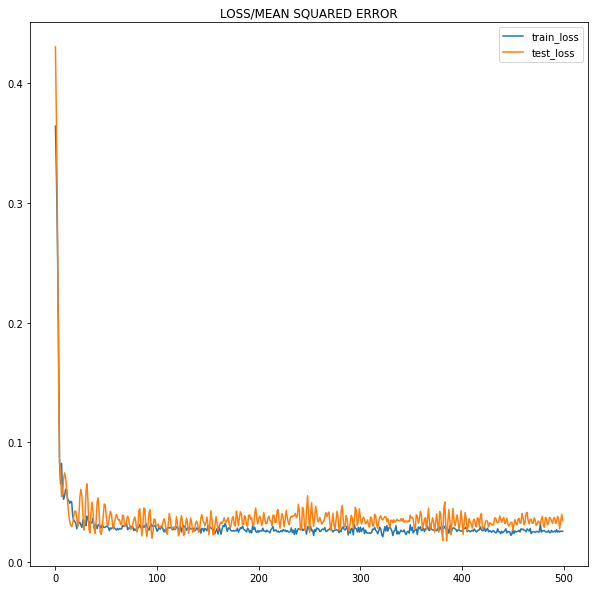

In [ ]:
plt.figure(figsize=(10,10))
plt.title("LOSS/MEAN SQUARED ERROR")
plt.plot(hist.history['loss'],label="train_loss")
plt.plot(hist.history['val_loss'],label="test_loss")
plt.legend()

In [ ]:
### Test modelusing x_test
## Predicted values of y_pred
y_pred=regression.predict(x_test)
y_pred

array([[0.33191717],
       [0.33122504],
       [0.33122504],
       [0.6104619 ],
       [0.39519176],
       [0.73590016],
       [0.76580465],
       [0.38328224]], dtype=float32)

In [ ]:
## Actual test values of y
y_test

12    0.555541
11    0.541506
35    0.280154
18    0.834044
30    0.552412
19    0.932372
22    0.996161
28    0.494537
Name: overall_emission, dtype: float64

In [ ]:
## Testing the model with individual values

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(y_test,y_pred)

0.03444806396285369

In [ ]:
r2_score(y_test,y_pred)

0.35092991044680055

In [ ]:
accuracy=regression.evaluate(x,y)
print('Accuracy: %.2f' %(accuracy*100))

2/2 [==============================] - 0s 4ms/step - loss: 0.0611
Accuracy: 6.11


In [ ]:
## Evaluate the model 
scores=regression.evaluate(x_test,y_test)
print('scores: %.2f' %(scores*100))
## Accuracy on test data

1/1 [==============================] - 0s 15ms/step - loss: 0.0344
scores: 3.44


In [ ]:
##Checking the Accuracy
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)
accuracy

0.35092991044680055

In [ ]:
## Evaluate the model 
scores=regression.evaluate(x_train,y_train)
print('scores: %.2f' %(scores*100))
## Accuracy on test data

1/1 [==============================] - 0s 16ms/step - loss: 0.0281
scores: 2.81


**Hyperparameter Tunning**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

**Grid SearchCV**

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV


rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=1, 
                       n_jobs = -1)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=1)

In [ ]:
rf_grid.best_params_

{'max_depth': 8, 'max_features': 0.6, 'max_samples': 1.0, 'n_estimators': 60}

In [ ]:
rf_grid.best_score_

0.7844599534394435

**RandomSearchCV**

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0], 'bootstrap': [True, False], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 380, in fit
    "`max_sample` cannot be set if `bootstrap=False`. "
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitF

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 8, None],
                                        'max_features': [0.2, 0.6, 1.0],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [ ]:
rf_grid.best_params_

{'n_estimators': 60,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 0.75,
 'max_features': 0.6,
 'max_depth': None,
 'bootstrap': True}

In [ ]:
rf_grid.best_score_

0.6720365210798013